# 机器学习实验报告-lab5-层次聚类
**姓名：** 郭裕彬
**学号：** 2114052
**专业：** 物联网工程
## 实验要求
### 基本要求
绘制聚类前后样本分布情况
1. 实现 single-linkage 层次聚类算法；
2. 实现 complete-linkage 层次聚类算法。
### 中级要求
实现 average-linkage 层次聚类算法，绘制样本分布图。
### 高级要求
对比上述三种算法，给出结论
### 扩展要求
通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。

In [26]:
from matplotlib import pyplot as plt
import numpy as np
from itertools import permutations

In [27]:
#从给出的数据文件中读取数据和标签
data = list(np.loadtxt('data.dat', delimiter=' '))
data = np.array(data)
labels = list(np.loadtxt('label.dat'))
labels = np.array(labels)

## 基本要求&中级要求

In [28]:
#每次类合并后更新合并后的类在类间距矩阵中的数据
def modify_distance(matrix,type):
    if type == 1:#single_linkage
        return np.min(matrix,axis=0)
    elif type == 2:#complete_linkage
        return np.max(matrix,axis=0)
    else:#average_linkage
        return np.average(matrix,axis=0)


In [29]:
#计算初始的点欧几里得间距矩阵
node_dis_matrix = np.zeros((data.shape[0],data.shape[0]))
for i in range(data.shape[0]):
        for j in range(i,data.shape[0]):
            if i == j:
                dist = 65536  #定义同一个点的距离为一个最大值
            else:
                dist = np.sqrt(np.sum(np.square(data[i] - data[j])))
            node_dis_matrix[i][j] = dist
            node_dis_matrix[j][i] = dist

#主要的聚类函数
def cal_clustering(name, k):
    if name == 'single_linkage':
        type = 1
    elif name == 'complete_linkage':
        type = 2
    else:
        type = 3

    #使用聚合聚类方法，初始化所有聚类
    clusters = []
    for i in range(data.shape[0]):
        node = [i]
        clusters.append(node)

    #初始化聚类间距离矩阵
    dis_matrix = np.array(node_dis_matrix)

    #聚类个数大于所要求的个数时
    while len(clusters) != k:
        min_cluster1 = int(np.argmin(dis_matrix)/dis_matrix.shape[0])#获取相距最近的两个聚类中排序较小的一个的索引
        min_cluster2 = np.argsort(dis_matrix[min_cluster1])[0]#获取另一个的索引
        clusters[min_cluster1] = clusters[min_cluster1] + clusters[min_cluster2]#聚类合并到索引较小的一个中

        #根据选择的方式调整合并后的聚类间距离矩阵
        temp = modify_distance(dis_matrix[[min_cluster1, min_cluster2]], type)
        dis_matrix[min_cluster1] = temp
        dis_matrix[:, min_cluster1] = temp

        #删除较大索引的聚类
        del clusters[min_cluster2]
        dis_matrix = np.delete(dis_matrix, min_cluster2, axis = 0)
        dis_matrix = np.delete(dis_matrix, min_cluster2, axis = 1)

        #定义同一个聚类的距离为一个最大值
        dis_matrix[min_cluster1,min_cluster1] = 65536

    print(name,"clustering finish......")
    correct_rates = []
    results = []
    #从所有可能的标签和聚类对应的情况中选择正确率最高的那个作为最终结果
    cases = [x for x in range(k)]
    cases = permutations(cases)
    for case in cases:
        temp = np.zeros(labels.shape)
        for i in range(len(case)):
            temp[clusters[i]] = case[i]
        results.append(temp)
        correct_number = 0
        for j in range(temp.shape[0]):
            if temp[j] == labels[j]:
                correct_number += 1
        correct_rate = correct_number / temp.shape[0]
        correct_rates.append(correct_rate)
    correct = np.max(correct_rates)
    result = results[np.argmax(correct_rates)]
    print(name,"determine labels finish......")
    return correct,result


In [30]:
#计算三种算法的聚类结果
correct_single, labels_single = cal_clustering('single_linkage', 4)
correct_complete, labels_complete = cal_clustering('complete_linkage', 4)
correct_average, labels_average = cal_clustering('average_linkage', 4)

single_linkage clustering finish......
single_linkage determine labels finish......
complete_linkage clustering finish......
complete_linkage determine labels finish......
average_linkage clustering finish......
average_linkage determine labels finish......


single_linkage层次聚类算法正确率为 0.5005
complete_linkage层次聚类算法正确率为 0.9945
average_linkage层次聚类算法正确率为 0.9985


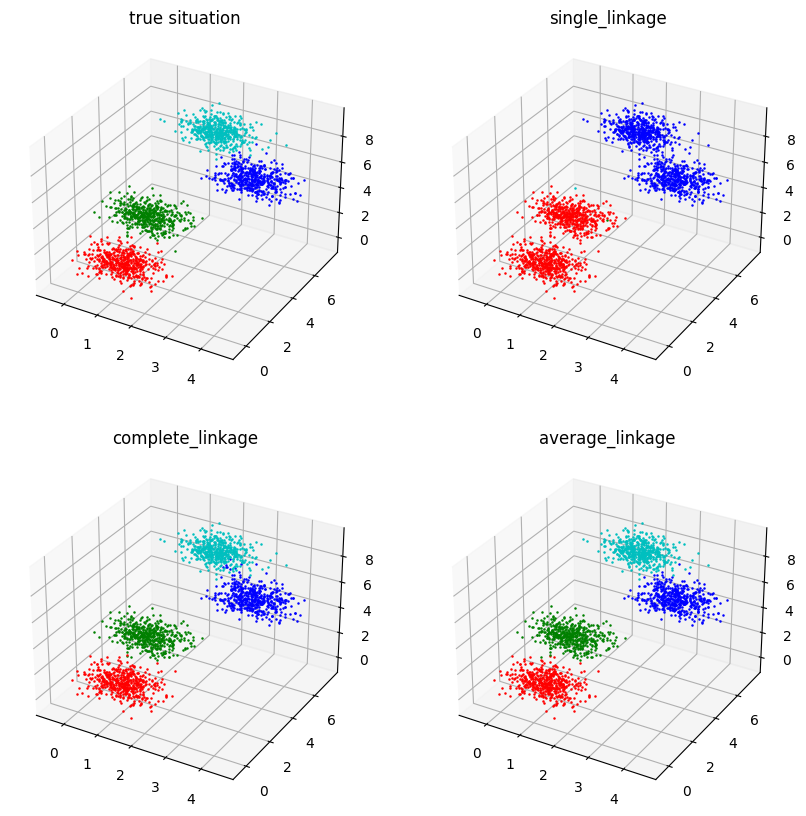

In [31]:
#绘图
def plot_draw(data, label,type):
    fig = plt.figure(figsize=(10,10), dpi=100)
    colors = 'rgbcmyk'
    for k in range(1,5):
        t = fig.add_subplot(2,2,k,projection='3d')
        for i in range(len(data)):
            t.scatter(data[i][0],data[i][1],data[i][2],color=colors[int(label[k-1][i])], s=np.pi/5)
        plt.title(type[k-1])
    plt.show()


all_labels = []
all_labels.append(labels)
all_labels.append(labels_single)
all_labels.append(labels_complete)
all_labels.append(labels_average)
names = ['true situation','single_linkage','complete_linkage','average_linkage']
print("single_linkage层次聚类算法正确率为",correct_single)
print("complete_linkage层次聚类算法正确率为",correct_complete)
print("average_linkage层次聚类算法正确率为",correct_average)
plot_draw(data,all_labels,names)

## 高级要求
从上述结果可以看出，average_linkage算法和complete_linkage算法的聚类效果要显著优于single_linkage，并且single_linkage算法结果中出现了两个只包含一个点的类。结合资料的查阅，给出如下的结论：
1. single_linkage单链接通过将两个最近的簇中的最近的两个成员连接在一起，来定义簇之间的距离，它适用于发现不规则形状和大小的簇，但对噪声和异常值敏感，容易形成长链。当两个距离较远的聚类之间存在某两个比较近的点时，这两个聚类也会被选择合并，这也就是为什么在聚合聚类方式实现下，小的聚类不断被合并到较大的聚类中，最终形成两个孤立的点类和两个巨大的聚类。
2. complete_linkage全链接通过将两个簇中的最远成员连接在一起，来定义簇之间的距离。它可以形成更均匀大小的簇，但可能在处理不规则形状的簇时效果不佳。这种聚合方法对离群点的处理能力不足，即当两个聚类总体上十分接近时，仍会因为存在某两个相聚较远的点而出现无法合并的情况，虽然在本次数据集中并未出现。全链接和单链接的问题都是类似的，都会因为某些极端情况的出现而大幅度影响聚类的结果。
3. average_linkage平均距离通过计算两个簇中所有成员之间的平均距离，来定义簇之间的距离。这是一种折中的方法，同时具有比较大的计算量，但因为考虑到了整体的情况，不容易因为某些极端边界值的出现而影响聚类结果，